# Titanic Data Analysis

Questions:
1)Did gender play a role in survivability rate?
2)Did passenger class affect survival rate?

## Data Wrangling Process

In [108]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sp
import seaborn as se
data = pd.read_csv('titanic-data.csv')
#Data Wrangling
age_no_null = data[data['Age'].notnull()]
del data['Cabin']
del data['Name']
del data['Ticket']
#Will later be used to graph
def graph(data, type_graph):
    data.plot(type_graph)
#Deleting for this data is warranted on the assumption that name cabin and ticket did not play a role in survavivability
#moving the survivor data to another varible and the same for the amount of deaths
data_survivor =data[data['Survived']== 1]
data_deaths = data[data['Survived']== 0]
#Female Survivors/Deaths
data_survivor_female = data[data['Survived' ] == 1]
data_survivor_female = data_survivor_female[data_survivor_female['Sex'] == 'female']
#Death
data_death_female = data[data['Survived'] == 0]
data_death_female = data_death_female[data_death_female['Sex'] == 'female']
#Male Survivors/Death
data_survivor_male = data[data['Survived'] == 1]
data_survivor_male = data_survivor_male[data_survivor_male['Sex'] == 'male']
#Death
data_death_male = data[(data['Survived'] == 0) & (data['Sex'] == 'male')]
#Total size of population both male and female
gender_size = len(data['Sex'])
#Number of total males in the data set
male_count = len(data[data['Sex']== 'male'])
#Number of total females in data set
female_count = len(data[data['Sex'] == 'female'])
#Number of males that survived the accident
male_survive_count = len(data_survivor[data_survivor['Sex'] == 'male'])
#number of females that survived the accident
female_survive_count =len(data_survivor[data_survivor['Sex'] == 'female'])
#Number of first class survivors/deaths Male
male_survivors_class1_count = len(data_survivor_male[data_survivor_male['Pclass'] == 1])
male_death_class1_count = len(data_death_male[data_death_male['Pclass'] == 1])
#Number of second class survivors Male
male_survivors_class2_count = len(data_survivor_male[data_survivor_male['Pclass'] == 2])
male_death_class2_count = len(data_death_male[data_death_male['Pclass'] == 2])
#Number of thrid class survivors Male
male_survivors_class3_count = len(data_survivor_male[data_survivor_male['Pclass'] == 3])
male_death_class3_count = len(data_death_male[data_death_male['Pclass'] == 3])
#Number of first class survivors Female
female_survivors_class1_count = len(data_survivor_female[data_survivor_female['Pclass'] == 1])
female_death_class1_count = len(data_death_female[data_death_female['Pclass'] == 1])
#Number of second class survivors Female
female_survivors_class2_count = len(data_survivor_female[data_survivor_female['Pclass'] == 2])
female_death_class2_count = len(data_death_female[data_death_female['Pclass'] == 2])
#Number of thrid class survivors Female
female_survivors_class3_count = len(data_survivor_female[data_survivor_female['Pclass'] == 3])
female_death_class3_count = len(data_death_female[data_death_female['Pclass'] == 3])
#Follwing steps are done to get correct age data
bool_null_age = pd.isnull(data['Age'])
missing_female_age = (data[bool_null_age]['Sex']) == 'female'
missing_male_age = data[bool_null_age]['Sex'] == 'male'
#Number of survivors by class disregrad genders
#Class 1
survivors_class1_count = len(data_survivor[data_survivor['Pclass'] == 1])
death_class1_count = len(data_deaths[data_deaths['Pclass'] == 1])
#Class 2
survivors_class2_count = len(data_survivor[data_survivor['Pclass'] == 2])
death_class2_count = len(data_deaths[data_deaths['Pclass'] == 2])
#Class 3
survivors_class3_count = len(data_survivor[data_survivor['Pclass'] == 3])
death_class3_count = len(data_deaths[data_deaths['Pclass'] == 3])

After going through the data I felt that cabin,name, and ticket number were not useful cells in our data. As such, I decided to delete them from the data set as to seed up the process that is taken to go through the data. My justification for deleting the cabin cell is that a lot of the rows were missing information which would have led to a misguided assumption if I had used cabin as a factor in survivability. Furthermore, name did not have anything to do wiht the survivability of a person. If we ere to identify the person we could use passenger id. In addition, I decided to delete the ticket number column for the reason that it was not really needed. If we werre to identify in what class a person was we could the Pclass cell.

# Age Factor In Surviving

Total number of survivors 288 
Total number of deaths 424 
Average age of survivors 28.0 
Average age of deaths 31.0 
Oldest to survive 80.0 
Oldest to die 74.0


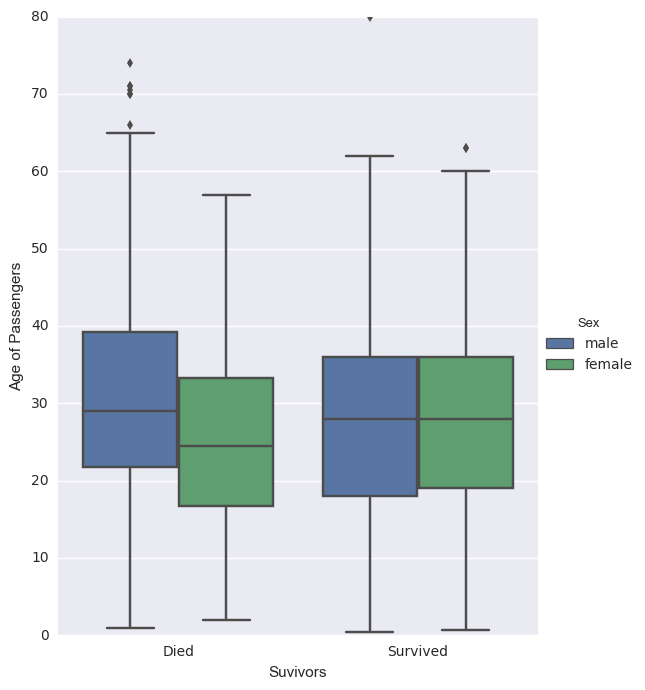

In [109]:
#Get youngest and oldest survivor and death
young_survive = data[data['Survived'] == 1]['Age'].min()
young_dead = data[data['Survived'] == 0]['Age'].min()
oldest_dead = data[data['Survived'] == 0]['Age'].max()
oldest_survive = data[data['Survived'] == 1]['Age'].max()
#Drops the NaN values
data = data.dropna()
count_survived = data[data['Survived'] == 1]['Survived'].count()
count_dead = data[data['Survived'] == 0]['Survived'].count()
#Age average for survivors and deaths
mean_age_survive = data[data['Survived'] == 1]['Age'].mean()
mean_age_dead = data[data['Survived'] == 0]['Age'].mean()
print 'Total number of survivors {} \n\
Total number of deaths {} \n\
Average age of survivors {} \n\
Average age of deaths {} \n\
Oldest to survive {} \n\
Oldest to die {}' \
.format(count_survived, count_dead, np.round(mean_age_survive), 
        np.round(mean_age_dead), oldest_survive, oldest_dead)
box = se.factorplot(x='Survived',y = 'Age', hue = 'Sex',data=data, kind="box", size=7, aspect=.8)
box.set_axis_labels('Suvivors', 'Age of Passengers')\
    .set_xticklabels(["Died", "Survived"])

After reviewing the data that was given to me through the box plot, I can come to two conclusion. One, survivability of a passenger regarding age, proved no correlation. Second, average age for those that died was similar to average age of those that survived.

## Graph of Survivors By Class

Populating the interactive namespace from numpy and matplotlib
Percentage of first class survivors is: 39.7660818713 %
Percentage of second class survivors is: 25.4385964912 %
Percentage of thirs class survivors is: 34.7953216374 %


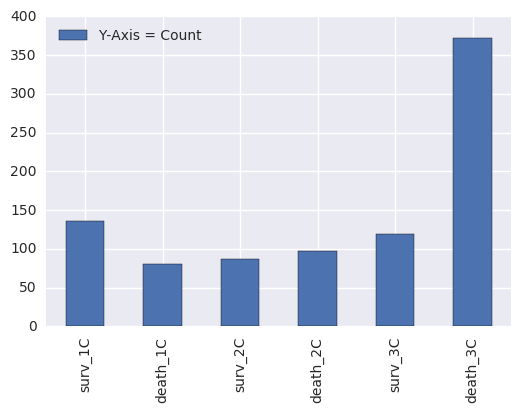

In [110]:
%pylab inline
def graph_special(data, type_graph):
    data.plot(type_graph,legend = True,label = 'Y-Axis = Count')
graph_special(pd.Series([survivors_class1_count,death_class1_count,survivors_class2_count,\
                 death_class2_count,survivors_class3_count,death_class3_count],index = ['surv_1C','death_1C',\
                                                                                       'surv_2C','death_2C',\
                                                                                       'surv_3C','death_3C'],\
                                                                                        ),'bar')
print "Percentage of first class survivors is:", ((float(survivors_class1_count)/len(data_survivor))*100),'%'
print "Percentage of second class survivors is:", ((float(survivors_class2_count)/len(data_survivor))*100),'%'
print "Percentage of thirs class survivors is:", ((float(survivors_class3_count)/len(data_survivor))*100),'%'

## Observations


At first galnce it does not seem to clearly tell us if there is a correlation between passenger class and survivability rate. As such, we have to perform a chi-test to figure out if there is a correlation. Our degress of freedom will be 2. Our Null Hypothesis H0 = Pclass and survivability are independent. Our Alternative hypothesis is HA= Pclass and survivability are not independent. After running our test we notice that the p value is below .05. As such, we reject the null hypothesis . It is statistically safe to say that passenger class plays a role in the survivability of males on the titanic.

In [111]:
data_array = np.array([[80, 97, 372], [136, 87, 119]])
chi2, p, dof, ex = sp.chi2_contingency(data_array, correction=False)
print "p-value: ", p

p-value:  4.5492517113e-23


# Graph Survivability by males


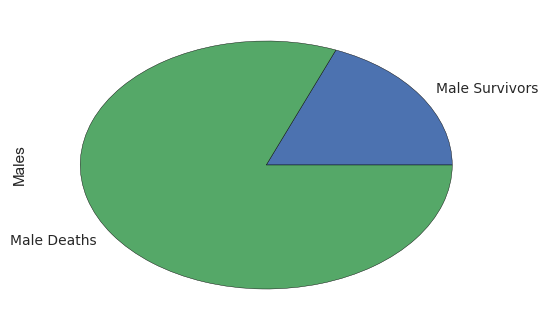

In [112]:
graph(pd.Series([len(data_survivor_male),len(data_death_male)],index = ['Male Survivors','Male Deaths'],name ='Males'),'pie')

## Observations

In [113]:
print 'Percentage of male survivors is: ', len(data_survivor_male)/float(len(data_survivor_male)+len(data_death_male))*100

Percentage of male survivors is:  18.8908145581


# Graph Survivability by females

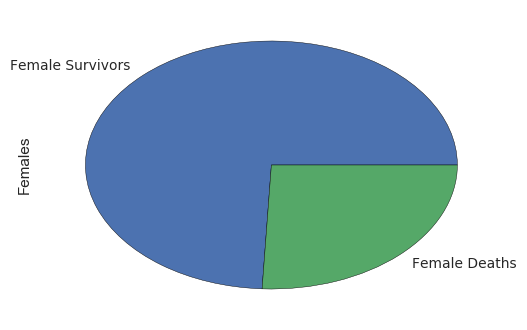

In [114]:
graph(pd.Series([len(data_survivor_female),len(data_death_female)],index = ['Female Survivors','Female Deaths'],name ='Females'),'pie')

In [115]:
print 'Percentage of Female survivors is: ', len(data_survivor_female)/float(len(data_survivor_female)+len(data_death_female))*100

Percentage of Female survivors is:  74.2038216561


## Observations


To see if there is any correlation between the two factors I will use a difference in proportions test wiht a significance level of .05. prop1 will be proportion of male survivors. prop2 will be the proportion of female survivors
My null hypothesis is H0= p1 = p2. My alternative hypothesis HA = p1 != p2

In [116]:
p = (0.188908145581 * 577 + 0.742038216561 * 314) / (314 + 577)
standard_error = sqrt( 0.384 * (1-0.384) * ((1/577.0) + (1/314.0)) )
z = (0.188908145581 - 0.742038216561) / 0.0341
print 'p = ', p
print 'Standard error: ',standard_error
print 'Z-score: ', z

p =  0.383838383839
Standard error:  0.0341068875758
Z-score:  -16.2208231959


Since -16.2 < -1.96 we can go ahead and reject the Null Hypothesis.As such, we safely delcare that beign a female increased your likelyhood of survival

In [117]:
print '***********************Males*****************************************************'
print "Number of first class males",(male_survivors_class1_count+male_death_class1_count)
print "Number of first class male survivors",male_survivors_class1_count
print "Number of second class males",(male_survivors_class2_count+male_death_class2_count)
print "Number of second class male survivors",male_survivors_class2_count
print "Number of third class males",(male_survivors_class3_count+male_death_class3_count)
print "Number of third class male survivors",male_survivors_class3_count
print '***********************Females*****************************************************'
print "Number of first class females",(female_survivors_class1_count+female_death_class1_count)
print "Number of first class female survivors",female_survivors_class1_count
print "Number of second class females",(female_survivors_class2_count+female_death_class2_count)
print "Number of second class female survivors",female_survivors_class2_count
print "Number of third class females",(female_survivors_class3_count+female_death_class3_count)
print "Number of third class female survivors",female_survivors_class3_count

***********************Males*****************************************************
Number of first class males 122
Number of first class male survivors 45
Number of second class males 108
Number of second class male survivors 17
Number of third class males 347
Number of third class male survivors 47
***********************Females*****************************************************
Number of first class females 94
Number of first class female survivors 91
Number of second class females 76
Number of second class female survivors 70
Number of third class females 144
Number of third class female survivors 72


As one can see there is a clear distinction of the rate of survival in the different classes. First class, in terms of proportions, had a higher likelyhood of making it out alive, followed by second class then third class. Furthremore, its can also bee senn that if you were a women, you had a better chance of making it out alive. At least halve of the women in each of hte classes made it out alive. The survivability of classes can be attributed ot the location of the living quarters for each class. First class resided near the middle of the boat and in upper levels, while second class below them and more to teh sides and finally third class all the way at the ends of the boat. The location of each class allowed the other to have an advantage of getting to exists and being able to escape.

# Conclusion

Throughout the project I enjoyed learning how ot manipulate data and how to use pandas to graph them. One finding that I found interesting was the difference  in survaivability rate of males and females. I knew that more females had survived, but I did not know that the difference was so great. Furthermore, unlike the difference of survaivability of socieconomic status of males, females did not expericen this issus so greatly. Some limitations to our study could be that from the data tha was pulled,179 of the rows of data were missing the column that had to deal with age. For this reason I chose not to explore if age and survivability had anything in common. In addition, theres is statistical evidence that gender and class play a role in the survivability of a person. The difference of passengers that made it out alive could be attributed to the fact that thirs class passengers were not usually allowed at the upper decks, unlike first class passengers. This could have led to third class passengers beigng confused as to where they should go. Also, during this time, the phrase "women and children" was something that people took to heart. This could explain why a lot of women made it out compared to men.